In [1]:
from keras import layers
from keras import models
model = models.Sequential()

In [2]:
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512,activation = 'relu'))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = 'D:/detection_project/image_database/trainset'
test_dir = 'D:/detection_project/image_database/testset'
validation_dir = 'D:/detection_project/image_database/validationset'

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 20,class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 20,class_mode = 'binary')



Found 1726 images belonging to 2 classes.
Found 884 images belonging to 2 classes.


In [16]:
train_datagen1 = ImageDataGenerator(
                                    rescale = 1./255,
                                    rotation_range= 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest',
                                   )
test_datagen1 = ImageDataGenerator(rescale = 1./255)
train_generator1 = train_datagen1.flow_from_directory(train_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')
validation_generator1 = test_datagen1.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')


Found 1726 images belonging to 2 classes.
Found 884 images belonging to 2 classes.


In [5]:
for data_batch,labels_batch in train_generator:
    print('data batch :',data_batch)
    print('labels batch :',labels_batch)
    break

data batch : [[[[0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   ...
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]
   [0.11764707 0.11764707 0.11764707]]

  [[0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   ...
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]]

  [[0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   [0.10588236 0.10588236 0.10588236]
   ...
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]
   [0.10980393 0.10980393 0.10980393]]

  ...

  [[0.12156864 0.12156864 0.12156864]
   [0.1137255  0.1137255  0.1137255 ]
   [0.11764707 0.11764707 0.11764707]
   ...
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]
   [0.1137255  0.1137255  0.1137255 ]]

  [[0.12156864 0.12156864 0.1215

In [6]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
model1.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [7]:
history = model.fit(train_generator,
                              steps_per_epoch=80,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps= 40)

Epoch 1/30
80/80 [==============================] - 28s 337ms/step - loss: 0.6814 - accuracy: 0.5662 - val_loss: 0.6833 - val_accuracy: 0.5763
Epoch 2/30
80/80 [==============================] - 25s 316ms/step - loss: 0.6085 - accuracy: 0.6869 - val_loss: 0.5703 - val_accuracy: 0.7175
Epoch 3/30
80/80 [==============================] - 25s 316ms/step - loss: 0.5623 - accuracy: 0.7112 - val_loss: 0.5428 - val_accuracy: 0.7000
Epoch 4/30
80/80 [==============================] - 26s 319ms/step - loss: 0.5277 - accuracy: 0.7264 - val_loss: 0.5245 - val_accuracy: 0.7588
Epoch 5/30
80/80 [==============================] - 27s 332ms/step - loss: 0.5008 - accuracy: 0.7431 - val_loss: 0.5119 - val_accuracy: 0.7362
Epoch 6/30
80/80 [==============================] - 26s 330ms/step - loss: 0.4659 - accuracy: 0.7736 - val_loss: 0.5104 - val_accuracy: 0.7462
Epoch 7/30
80/80 [==============================] - 28s 350ms/step - loss: 0.4403 - accuracy: 0.7907 - val_loss: 0.5611 - val_accuracy: 0.7000

In [18]:
history1 = model1.fit(train_generator,
                              steps_per_epoch=80,
                              epochs=100,
                              validation_data = validation_generator,
                              validation_steps= 40)

Epoch 1/100
80/80 [==============================] - 25s 304ms/step - loss: 0.6883 - acc: 0.5441 - val_loss: 0.6609 - val_acc: 0.6475
Epoch 2/100
80/80 [==============================] - 25s 313ms/step - loss: 0.6421 - acc: 0.6349 - val_loss: 0.6177 - val_acc: 0.6888
Epoch 3/100
80/80 [==============================] - 26s 326ms/step - loss: 0.5989 - acc: 0.6812 - val_loss: 0.5709 - val_acc: 0.6637
Epoch 4/100
80/80 [==============================] - 26s 325ms/step - loss: 0.5658 - acc: 0.7024 - val_loss: 0.5485 - val_acc: 0.6925
Epoch 5/100
80/80 [==============================] - 26s 320ms/step - loss: 0.5437 - acc: 0.7194 - val_loss: 0.5763 - val_acc: 0.6725
Epoch 6/100
80/80 [==============================] - 26s 322ms/step - loss: 0.5142 - acc: 0.7459 - val_loss: 0.5525 - val_acc: 0.6988
Epoch 7/100
80/80 [==============================] - 25s 317ms/step - loss: 0.4934 - acc: 0.7453 - val_loss: 0.5161 - val_acc: 0.7387
Epoch 8/100
80/80 [==============================] - 25s 314ms

Epoch 62/100
80/80 [==============================] - 26s 329ms/step - loss: 0.0466 - acc: 0.9823 - val_loss: 1.2701 - val_acc: 0.6675
Epoch 63/100
80/80 [==============================] - 26s 327ms/step - loss: 0.0404 - acc: 0.9874 - val_loss: 1.3993 - val_acc: 0.6425
Epoch 64/100
80/80 [==============================] - 27s 338ms/step - loss: 0.0505 - acc: 0.9823 - val_loss: 1.3301 - val_acc: 0.7013
Epoch 65/100
80/80 [==============================] - 26s 327ms/step - loss: 0.0469 - acc: 0.9855 - val_loss: 1.2901 - val_acc: 0.7075
Epoch 66/100
80/80 [==============================] - 27s 340ms/step - loss: 0.0454 - acc: 0.9849 - val_loss: 0.9964 - val_acc: 0.7287
Epoch 67/100
80/80 [==============================] - 27s 342ms/step - loss: 0.0409 - acc: 0.9836 - val_loss: 1.2690 - val_acc: 0.6862
Epoch 68/100
80/80 [==============================] - 28s 350ms/step - loss: 0.0377 - acc: 0.9874 - val_loss: 1.3123 - val_acc: 0.7113
Epoch 69/100
80/80 [==============================] - 2

In [8]:
model.save('2classification_base.h5')

In [20]:
model1.save('2classification_pro1.h5')

In [9]:
history.history

{'loss': [0.681409478187561,
  0.6085488200187683,
  0.562315821647644,
  0.5276933908462524,
  0.5008262991905212,
  0.46586522459983826,
  0.44030526280403137,
  0.40341031551361084,
  0.38488107919692993,
  0.34508827328681946,
  0.3180048167705536,
  0.2856258749961853,
  0.25656381249427795,
  0.22969572246074677,
  0.1947452574968338,
  0.17846444249153137,
  0.14980264008045197,
  0.12761032581329346,
  0.1084512397646904,
  0.09056445211172104,
  0.08046088367700577,
  0.05596689507365227,
  0.04679509252309799,
  0.040057115256786346,
  0.033768653869628906,
  0.034520357847213745,
  0.02438580058515072,
  0.020479118451476097,
  0.015131354331970215,
  0.01466956827789545],
 'accuracy': [0.566204309463501,
  0.6868749856948853,
  0.7112231850624084,
  0.7263556122779846,
  0.7431250214576721,
  0.7736443877220154,
  0.7906683683395386,
  0.809583842754364,
  0.8266078233718872,
  0.8512499928474426,
  0.8751576542854309,
  0.8896595239639282,
  0.9066835045814514,
  0.9098360

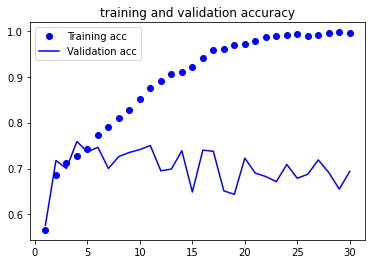

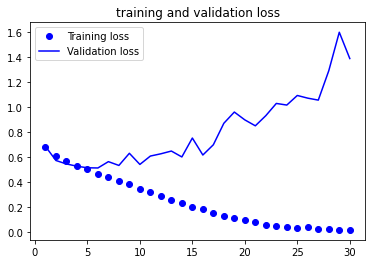

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title("training and validation accuracy")
plt.legend()


plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()





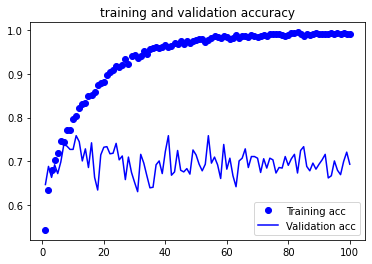

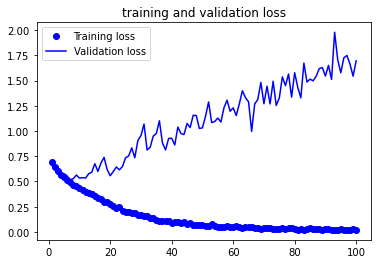

In [22]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1,len(acc1)+1)

plt.plot(epochs1,acc1,'bo',label = 'Training acc')
plt.plot(epochs1,val_acc1,'b',label = 'Validation acc')
plt.title("training and validation accuracy")
plt.legend()


plt.figure()

plt.plot(epochs1,loss1,'bo',label = 'Training loss')
plt.plot(epochs1,val_loss1,'b',label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()